In [1]:
import tensorflow as tf
import transformers

c:\Users\Joe\miniconda3\envs\tf\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
tf.__version__

'2.10.0'

In [8]:
import numpy as np
import pandas as pd

In [4]:
from transformers import TFAutoModel, AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

In [5]:
x_train_df = pd.read_csv('data/data_reviews/x_train.csv')
y_train_df = pd.read_csv('data/data_reviews/y_train.csv')

tr_text_list = x_train_df['text'].values.tolist()

In [6]:
x_test_df = pd.read_csv('data/data_reviews/x_test.csv')

test_text_list = x_test_df['text'].values.tolist()

In [7]:
x_test_df = x_test_df['text']

In [8]:
all_data = pd.concat([x_train_df,y_train_df], axis=1)

In [9]:
all_data = all_data[['text','is_positive_sentiment']]

In [10]:
testids = np.zeros((len(x_test_df),61))
testmask = np.zeros((len(x_test_df),61))


In [11]:
xids = np.zeros((len(all_data),61))
xmask = np.zeros((len(all_data),61))

In [12]:
xids.shape

(2400, 61)

In [13]:
for i , sequence in enumerate(all_data['text']):
    tokens = tokenizer.encode_plus(sequence, max_length=61, truncation=True,
                      padding='max_length', add_special_tokens=True,
                      return_attention_mask=True, return_token_type_ids=False,
                      return_tensors='tf')
    xids[i, :], xmask[i,:] = tokens['input_ids'], tokens['attention_mask']


In [14]:
for i , sequence in enumerate(x_test_df):
    tokens = tokenizer.encode_plus(sequence, max_length=61, truncation=True,
                      padding='max_length', add_special_tokens=True,
                      return_attention_mask=True, return_token_type_ids=False,
                      return_tensors='tf')
    testids[i, :], testmask[i,:] = tokens['input_ids'], tokens['attention_mask']


In [15]:
print(xids)
print(xmask)

[[  101.  2048.  1105. ...     0.     0.     0.]
 [  101.   157. 11612. ...     0.     0.     0.]
 [  101. 27124.  1104. ...     0.     0.     0.]
 ...
 [  101.  7277.  9725. ...     0.     0.     0.]
 [  101.  1284.  2802. ...     0.     0.     0.]
 [  101.  2516.  1108. ...     0.     0.     0.]]
[[1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 ...
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]]


In [16]:
print(testids)
print(testmask)

[[ 101. 6846. 1193. ...    0.    0.    0.]
 [ 101.  106.  119. ...    0.    0.    0.]
 [ 101. 1184.  170. ...    0.    0.    0.]
 ...
 [ 101. 1109. 1178. ...    0.    0.    0.]
 [ 101. 1422. 1334. ...    0.    0.    0.]
 [ 101. 1438.  117. ...    0.    0.    0.]]
[[1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 ...
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]]


In [17]:
labels = all_data.is_positive_sentiment.values

In [18]:
import tensorflow as tf
tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [19]:
dataset = tf.data.Dataset.from_tensor_slices((xids, xmask, labels))

In [20]:
testdata = tf.data.Dataset.from_tensor_slices((testids,testmask))

In [21]:
testdata

<TensorSliceDataset element_spec=(TensorSpec(shape=(61,), dtype=tf.float64, name=None), TensorSpec(shape=(61,), dtype=tf.float64, name=None))>

In [22]:
for i in dataset.take(1):
    print(i)

(<tf.Tensor: shape=(61,), dtype=float64, numpy=
array([ 101., 2048., 1105.,  146., 9424., 1106., 1145., 4734., 1103.,
       6994., 2942., 2629., 1122., 1144., 1113., 1240., 2179.,  119.,
        102.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.])>, <tf.Tensor: shape=(61,), dtype=float64, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])>, <tf.Tensor: shape=(), dtype=int64, numpy=0>)


In [23]:
def map_func(input_ids, masks, labels):

    return {'inputs_ids': input_ids, 'attention_mask': masks}, labels

In [24]:
def new_map(input_ids, masks):
    return {'inputs_ids': input_ids, 'attention_mask' : masks}

In [25]:
testdata = testdata.map(new_map)

In [26]:
dataset = dataset.map(map_func)

In [27]:
testdata

<MapDataset element_spec={'inputs_ids': TensorSpec(shape=(61,), dtype=tf.float64, name=None), 'attention_mask': TensorSpec(shape=(61,), dtype=tf.float64, name=None)}>

In [28]:
for i in dataset.take(1):
    print(i)

({'inputs_ids': <tf.Tensor: shape=(61,), dtype=float64, numpy=
array([ 101., 2048., 1105.,  146., 9424., 1106., 1145., 4734., 1103.,
       6994., 2942., 2629., 1122., 1144., 1113., 1240., 2179.,  119.,
        102.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.])>, 'attention_mask': <tf.Tensor: shape=(61,), dtype=float64, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])>}, <tf.Tensor: shape=(), dtype=int64, numpy=0>)


In [29]:
dataset = dataset.shuffle(100000).batch(32)

In [30]:
testdata = testdata.batch(32)

In [31]:
testdata

<BatchDataset element_spec={'inputs_ids': TensorSpec(shape=(None, 61), dtype=tf.float64, name=None), 'attention_mask': TensorSpec(shape=(None, 61), dtype=tf.float64, name=None)}>

In [32]:
DS_LEN = len(list(dataset))

In [33]:
DS_LEN

75

In [34]:
SPLIT = .9

train = dataset.take(round(DS_LEN*SPLIT))
val = dataset.skip(round(DS_LEN*SPLIT))

In [35]:
model = TFAutoModel.from_pretrained("bert-base-cased")

Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [36]:
input_ids = tf.keras.layers.Input(shape=(61,), name='inputs_ids', dtype='int32')
mask = tf.keras.layers.Input(shape=(61,), name='attention_mask', dtype='int32')

embeddings = model(input_ids, attention_mask = mask)[0]

#x = tf.keras.layers.Bidirectional(tf.keras.layers.GRU(128))(embeddings)
x = tf.keras.layers.GlobalMaxPool1D()(embeddings)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.50)(x)
x = tf.keras.layers.Dense(32, activation='relu')(x)
y = tf.keras.layers.Dense(1, activation='sigmoid', name='outputs')(x)

modelt = tf.keras.Model(inputs=[input_ids,mask], outputs = y)

modelt.layers[2].trainable = False

In [37]:
modelt.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 inputs_ids (InputLayer)        [(None, 61)]         0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 61)]         0           []                               
                                                                                                  
 tf_bert_model (TFBertModel)    TFBaseModelOutputWi  108310272   ['inputs_ids[0][0]',             
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 61,                                            

In [38]:
modelt.compile(
    loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']
)

In [39]:
history_dr50_long = modelt.fit(train, validation_data=val, epochs=25)

Epoch 1/25
68/68 [==============================] - 41s 402ms/step - loss: 0.5613 - accuracy: 0.7146 - val_loss: 0.5305 - val_accuracy: 0.8571
Epoch 2/25
68/68 [==============================] - 24s 356ms/step - loss: 0.4143 - accuracy: 0.8143 - val_loss: 0.3786 - val_accuracy: 0.8839
Epoch 3/25
68/68 [==============================] - 24s 359ms/step - loss: 0.3777 - accuracy: 0.8309 - val_loss: 0.2815 - val_accuracy: 0.9018
Epoch 4/25
68/68 [==============================] - 24s 359ms/step - loss: 0.3309 - accuracy: 0.8603 - val_loss: 0.2314 - val_accuracy: 0.9018
Epoch 5/25
68/68 [==============================] - 24s 360ms/step - loss: 0.3289 - accuracy: 0.8585 - val_loss: 0.1918 - val_accuracy: 0.9509
Epoch 6/25
68/68 [==============================] - 25s 361ms/step - loss: 0.2963 - accuracy: 0.8722 - val_loss: 0.1480 - val_accuracy: 0.9420
Epoch 7/25
68/68 [==============================] - 25s 363ms/step - loss: 0.2984 - accuracy: 0.8773 - val_loss: 0.1375 - val_accuracy: 0.9509

In [40]:
y_hat = modelt.predict(testdata)

19/19 [==============================] - 10s 304ms/step


In [41]:
np.savetxt('yproba1_test.txt', y_hat)

In [43]:
30/600

0.05

In [2]:
import pickle

In [94]:
'''with open('history_dr1.pkl','wb') as f:
    pickle.dump(history_dr1.history,f)'''

In [3]:
with open('history_dr1.pkl','rb') as f:
    history_dr1 = pickle.load(f)

In [104]:
'''with open('history_dr25.pkl','wb') as f:
    pickle.dump(history_dr25.history,f)'''

In [4]:
with open('history_dr25.pkl','rb') as f:
    history_dr25 = pickle.load(f)

In [115]:
'''with open('history_dr50.pkl','wb') as f:
    pickle.dump(history_dr50.history,f)'''

In [5]:
with open('history_dr50.pkl','rb') as f:
    history_dr50 = pickle.load(f)

In [7]:
history_dr1.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [9]:
epochs = np.arange(1,16)
print(epochs)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


In [11]:
dr_rate = np.array([0.10, 0.25, 0.50])
print(dr_rate)

[0.1  0.25 0.5 ]


In [39]:
history_dr25.get('accuracy')

[0.7229166626930237,
 0.8578125238418579,
 0.8588541746139526,
 0.8760416507720947,
 0.8989583253860474,
 0.878125011920929,
 0.890625,
 0.8932291865348816,
 0.9140625,
 0.9114583134651184,
 0.90625,
 0.9182291626930237,
 0.9354166388511658,
 0.9255208373069763,
 0.9286458492279053]

In [38]:
dr1_train_acc = np.array(history_dr1.get('accuracy'))
dr25_train_acc = np.array(history_dr25.get('accuracy'))
dr50_train_acc = np.array(history_dr50.get('accuracy'))

In [42]:
dr25_train_acc.shape

(15,)

In [43]:
train_acc = np.vstack((np.vstack((dr1_train_acc,dr25_train_acc)),dr50_train_acc))

In [46]:
train_acc.shape

(3, 15)

In [47]:
train_acc = train_acc.transpose()

In [48]:
train_acc

array([[0.75312501, 0.72291666, 0.69947916],
       [0.85364586, 0.85781252, 0.81822914],
       [0.87864584, 0.85885417, 0.83177084],
       [0.90208334, 0.87604165, 0.84843749],
       [0.89375001, 0.89895833, 0.8671875 ],
       [0.90104169, 0.87812501, 0.86770833],
       [0.90729165, 0.890625  , 0.86614585],
       [0.92447919, 0.89322919, 0.86770833],
       [0.92552084, 0.9140625 , 0.88229167],
       [0.91093749, 0.91145831, 0.88906252],
       [0.93281251, 0.90625   , 0.89010417],
       [0.93020833, 0.91822916, 0.89999998],
       [0.93906248, 0.93541664, 0.88489586],
       [0.94427085, 0.92552084, 0.8984375 ],
       [0.9453125 , 0.92864585, 0.90937501]])

In [49]:
train_acc_df = pd.DataFrame(train_acc, index=epochs, columns=dr_rate)

In [50]:
train_acc_df

,0.10,0.25,0.50
1,0.753125,0.722917,0.699479
2,0.853646,0.857813,0.818229
3,0.878646,0.858854,0.831771
4,0.902083,0.876042,0.848437
5,0.893750,0.898958,0.867188
6,0.901042,0.878125,0.867708
7,0.907292,0.890625,0.866146
8,0.924479,0.893229,0.867708
9,0.925521,0.914062,0.882292
10,0.910937,0.911458,0.889063


In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

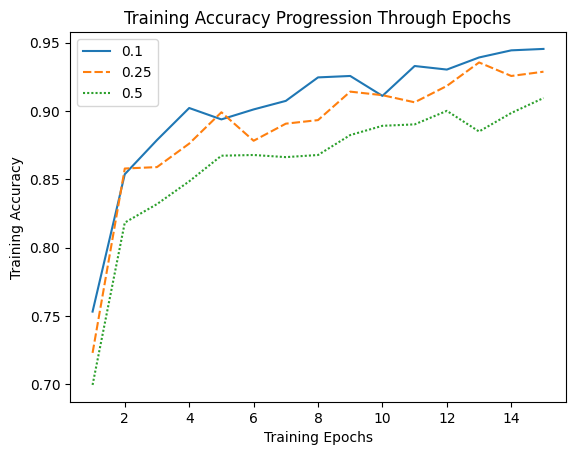

In [52]:
sns.lineplot(data=train_acc_df)
plt.xlabel('Training Epochs')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy Progression Through Epochs')
plt.show;

In [53]:
dr1_val_acc = np.array(history_dr1.get('val_accuracy'))
dr25_val_acc = np.array(history_dr25.get('val_accuracy'))
dr50_val_acc = np.array(history_dr50.get('val_accuracy'))

In [54]:
val_acc = np.vstack((np.vstack((dr1_val_acc,dr25_val_acc)),dr50_val_acc))

In [55]:
val_acc = val_acc.transpose()

In [56]:
val_acc_df = pd.DataFrame(val_acc, index=epochs, columns=dr_rate)

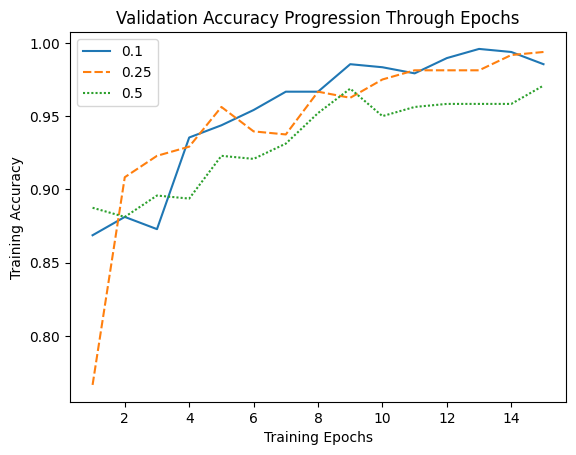

In [58]:
sns.lineplot(data=val_acc_df)
plt.xlabel('Training Epochs')
plt.ylabel('Training Accuracy')
plt.title('Validation Accuracy Progression Through Epochs')
plt.show;

In [117]:
#analyze results

In [121]:
history_dr1.get('val_accuracy')

[0.8687499761581421,
 0.8812500238418579,
 0.8729166388511658,
 0.9354166388511658,
 0.9437500238418579,
 0.9541666507720947,
 0.9666666388511658,
 0.9666666388511658,
 0.9854166507720947,
 0.9833333492279053,
 0.9791666865348816,
 0.9895833134651184,
 0.9958333373069763,
 0.9937499761581421,
 0.9854166507720947]

In [122]:
history_dr25.get('val_accuracy')

[0.7666666507720947,
 0.9083333611488342,
 0.9229166507720947,
 0.9291666746139526,
 0.956250011920929,
 0.9395833611488342,
 0.9375,
 0.9666666388511658,
 0.9624999761581421,
 0.9750000238418579,
 0.981249988079071,
 0.981249988079071,
 0.981249988079071,
 0.9916666746139526,
 0.9937499761581421]

In [123]:
history_dr50.get('val_accuracy')

[0.887499988079071,
 0.8812500238418579,
 0.8958333134651184,
 0.893750011920929,
 0.9229166507720947,
 0.9208333492279053,
 0.9312499761581421,
 0.9520833492279053,
 0.96875,
 0.949999988079071,
 0.956250011920929,
 0.9583333134651184,
 0.9583333134651184,
 0.9583333134651184,
 0.9708333611488342]